## A comprehensive hyperledger fabric performance evaluation based on resources capacity planning
Published in [Cluster Computing](https://link.springer.com/article/10.1007/s10586-024-04591-4) - June, 2024

**Authors**: Carlos Melo, Glauber Gonçalves, Francisco A. Silva & André Soares

<p style='text-align: justify;'> <strong>Abstract</strong>: <em> Hyperledger Fabric is a platform for permissioned blockchain networks that enables secure and auditable distributed data storage for enterprise applications. There is a growing interest in applications based on this platform, but its use requires the configuration of different blockchain parameters. Various configurations impact the system’s non-functional qualities, especially performance and cost. In this article, we propose a Stochastic Petri Net to model the performance of the Hyperledger Fabric platform with different blockchain parameters, computer capacity, and transaction rates. We also present a set of case studies to demonstrate the feasibility of the proposed model. This model serves as a practical guide to help administrators of permissioned blockchain networks find the best performance for their applications. The proposed model allowed us to identify the block size that leads to a high mean response time (ranging from 1 to 25 seconds) caused by a change in the arrival rate.</em> 

-----------------

**Pre-Print available [here](https://casm3.github.io/assets/publications/pdf/journals/journal-blockchain-2024.pdf)**

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
## Glossary

| **Term** | **Definition** |
|-----------|----------|
| **Blockchain**           | A distributed and immutable ledger that stores transactions between accounts, emerged in 2008 in a work by |
| **Permissioned**         | A blockchain that requires nodes to be identified. |
| **Hyperledger Fabric (HLF)** | An open-source permissioned blockchain platform evaluated in various industry and corporate scenarios. |
| **Smart Contracts**      | Programs that run over a blockchain, term coined by Vitalik Buterin. |
| **Chaincode**            | The name given to smart contracts in the HLF environment. |
| **Transaction**          | A proposal to update the ledger, invoking chaincode to execute business logic. |
| **Endorser Peer**        | A node that simulates and validates transaction proposals by executing chaincode and signing the results.  |
| **Orderer Peer**         | Responsible for receiving endorsed transactions, ordering them into blocks, and delivering these blocks to |
| **Commit**               | The process where peers validate a block of ordered transactions and append it to their local ledger.  |
| **Utilization**          | The proportion of system resources (e.g., CPU, memory) actively being used.  |
| **Throughput**           | The number of transactions processed per unit of time, usually in transactions per second (TPS).  |
| **Mean Response Time (MRT)** | The average time for a transaction to be processed and receive a response (latency).  |
| **Discard Probability**  | The likelihood of a transaction being discarded due to resource limitations. |
| **Block Size**           | The maximum number of transactions that can be included in a block.  |
| **Block Timeout**        | The maximum time allowed before a block is closed and ordered, even if the block isn't full (creating partial blocks). |
| **Activation Rate**      | The rate at which either block size path or block timeout path is followed by a given transaction. |

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Functions

In [2]:
def read_data(path, column_names=None, delimiter=';'):
    if column_names:
        return pd.read_csv(path, delimiter=delimiter, names=column_names, header=None)
    return pd.read_csv(path)

In [3]:
def plot_style(xlabel, ylabel):
    plt.xlabel(xlabel, fontsize=26)
    plt.ylabel(ylabel, fontsize=26)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', bottom=True, top=False, direction='in', length=5)
    plt.tick_params(axis='y', which='both', left=True, right=False, direction='in', length=5)
    plt.legend(fontsize=18, loc='lower right')

In [4]:
def general_line_plot(x_values, y_values_dict, ylabel, labels_colors):
    plt.figure(figsize=(10, 8))
    
    for label, (y_values, color) in y_values_dict.items():
        plt.plot(x_values, y_values, marker='o', linestyle='-', color=color, label=label, linewidth=3)
    
    plot_style('Arrival Rate (tps)', ylabel)
    plt.show()

In [5]:
def generate_plot(path, ylabel):
    column_names = ['Taxa_de_Chegada', 'cp_n=2', 'cp_n=4', 'cp_n=6']
    df = read_data(path, column_names=column_names)
    
    x_values = df['Taxa_de_Chegada'].astype(float)
    y_values_dict = {
        'cp_n=2': (df['cp_n=2'].str.split('/').str[0].astype(float), 'green'),
        'cp_n=4': (df['cp_n=4'].str.split('/').str[0].astype(float), 'red'),
        'cp_n=6': (df['cp_n=6'].str.split('/').str[0].astype(float), 'black')
    }
    
    general_line_plot(x_values, y_values_dict, ylabel, {'cp_n=2': 'green', 'cp_n=4': 'red', 'cp_n=6': 'black'})

In [6]:
def utilization_peers_plot(path, ylabel, metric):
    df = read_data(path)
    x_values = df[metric].astype(float)
    y_values_dict = {
        'Endorser': (df["U_END"].astype(float), 'green'),
        'Orderer': (df["U_ORD"].astype(float), 'red'),
        'Commit': (df["U_COMMIT"].astype(float), 'black')
    }
    
    general_line_plot(x_values, y_values_dict, ylabel, {'Endorser': 'green', 'Orderer': 'red', 'Commit': 'black'})

In [7]:
def call_rate_plot(path, ylabel, metric):
    df = read_data(path)
    x_values = df[metric].astype(float)
    y_values_dict = {
        'Block': (df["BLOCK_CALL_RATE"].astype(float), 'red'),
        'Time out': (df["TIME_OUT_CALL_RATE"].astype(float), 'black')
    }
    
    general_line_plot(x_values, y_values_dict, ylabel, {'Block': 'red', 'Time out': 'black'})

In [8]:
def plot_with_metric_and_column(path, ylabel, metric, column, cor):
    df = read_data(path)
    x_values = df[metric].astype(float)
    y_values = df[column].astype(float)
    
    plt.figure(figsize=(10, 8))
    plt.plot(x_values, y_values, marker='o', linestyle='-', color=cor, linewidth=3)
    
    plot_style(metric.replace('_', " ").title() + " (s)", ylabel)
    plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Utilization plots

### Endorser Utilization (U_END)

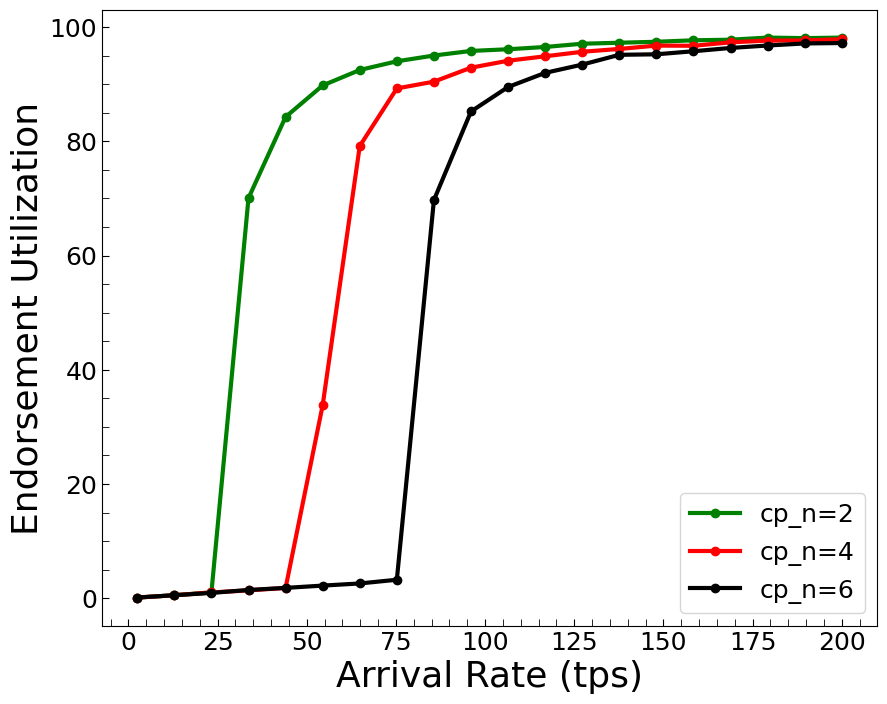

In [9]:
generate_plot('data/u_end.csv', 'Endorsement Utilization')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Orderer Utilization (U_ORD)

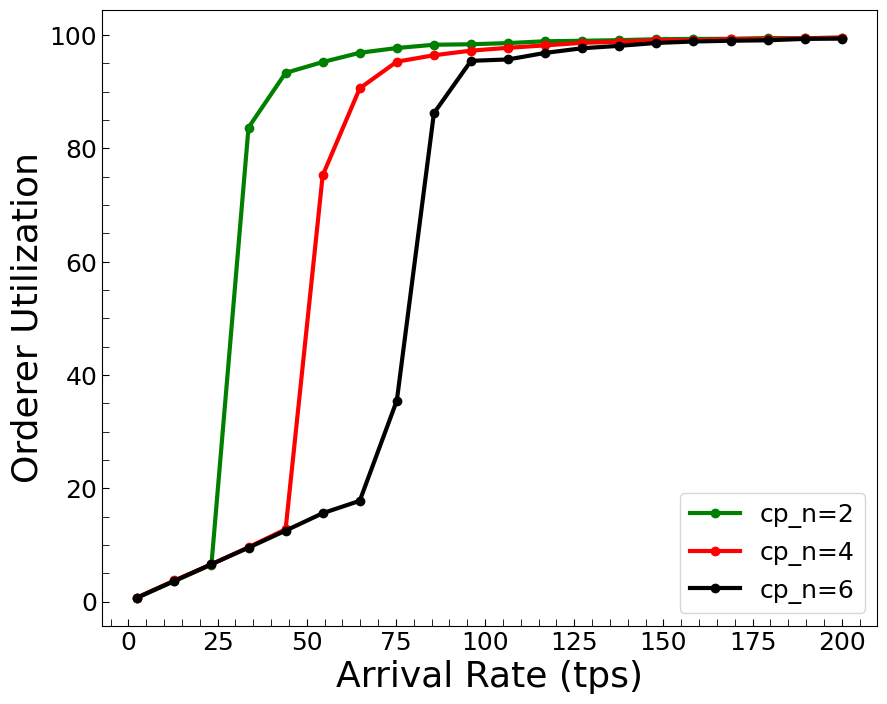

In [10]:
generate_plot('data/u_ORD.csv', 'Orderer Utilization')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Commit Utilization (U_COMMIT)

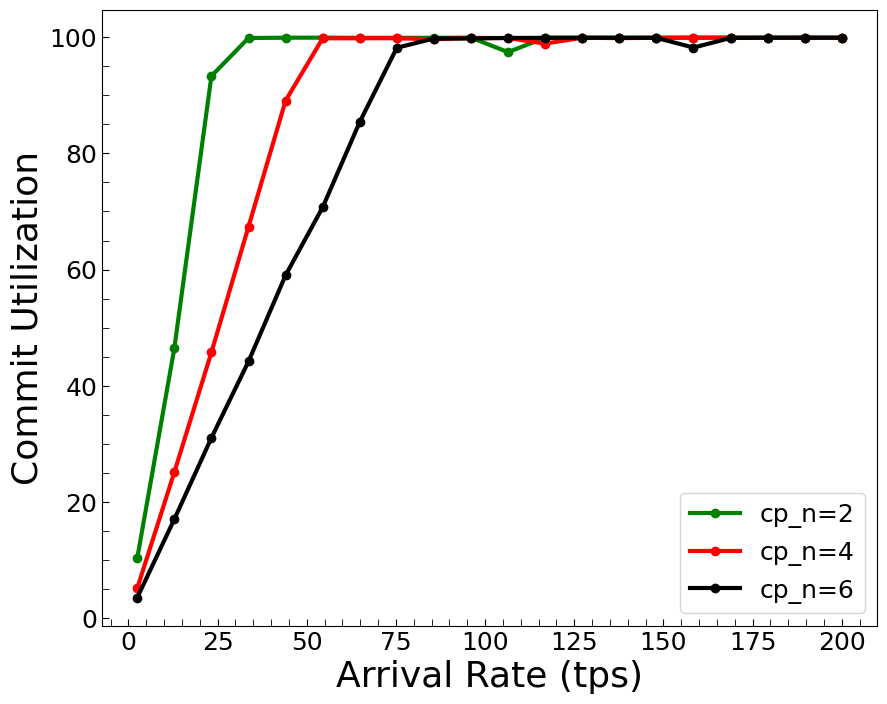

In [11]:
generate_plot('data/u_COMMIT.csv', 'Commit Utilization')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
### Discard Probability (DROP_PROB)

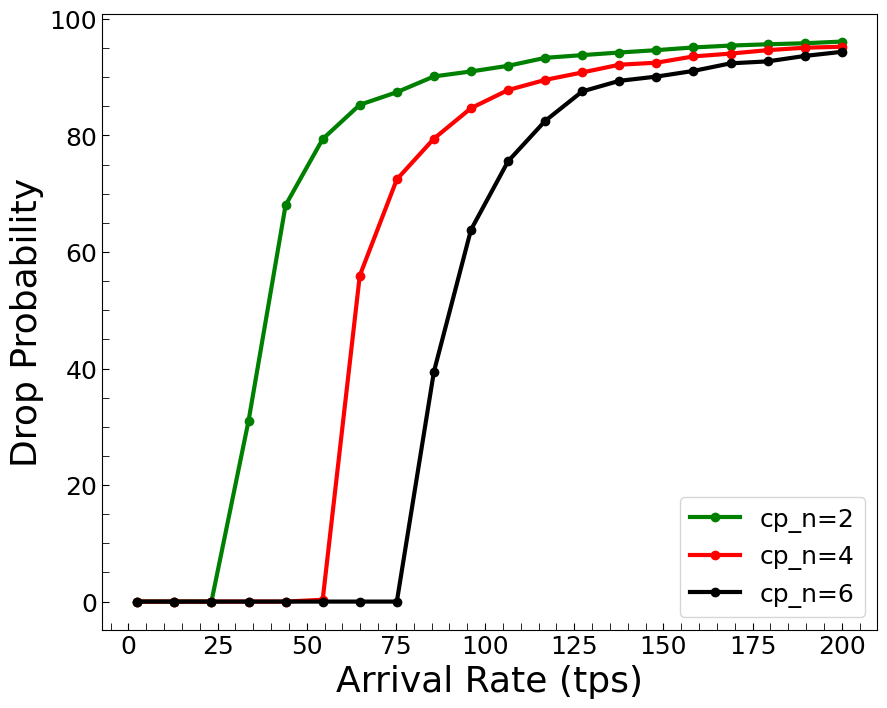

In [12]:
generate_plot('data/dp_prob.csv', 'Drop Probability')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Throughput

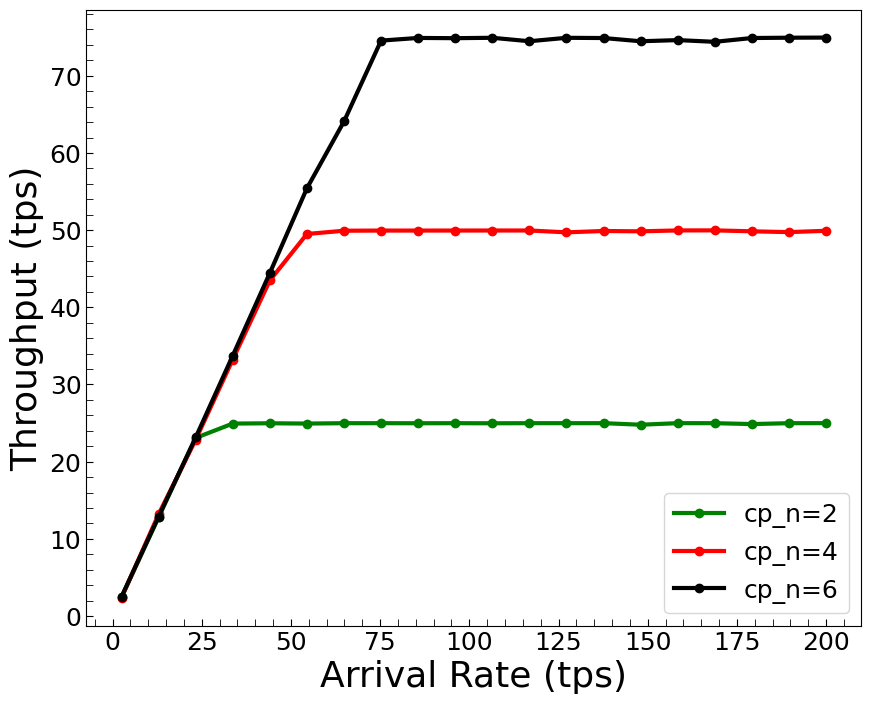

In [13]:
generate_plot('data/tp.csv', 'Throughput (tps)')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Mean Response Time (MRT)

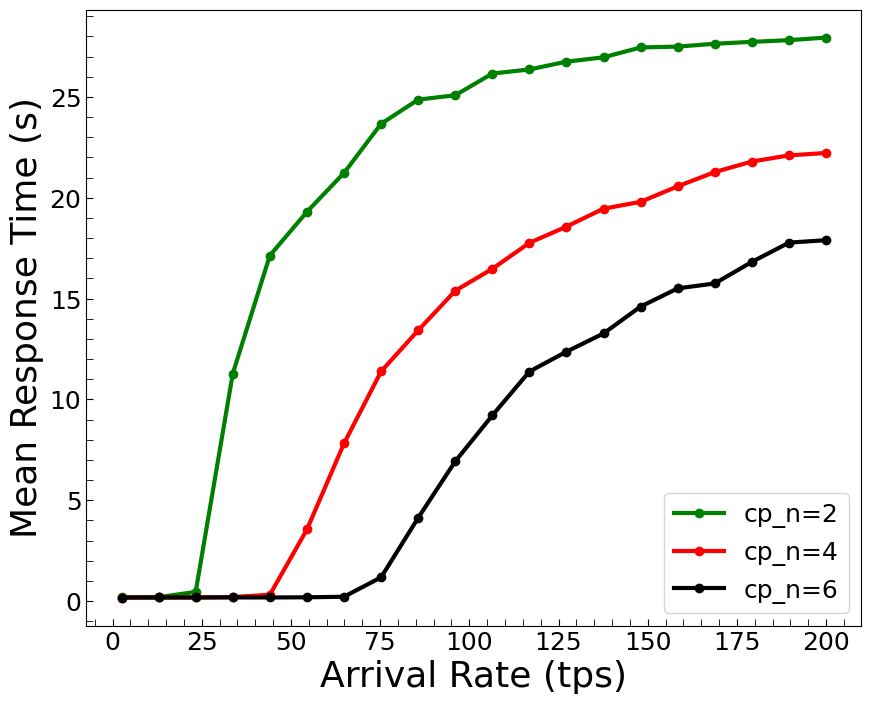

In [14]:
generate_plot('data/mrt.csv', 'Mean Response Time (s)')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Block Call Rate

## Block size

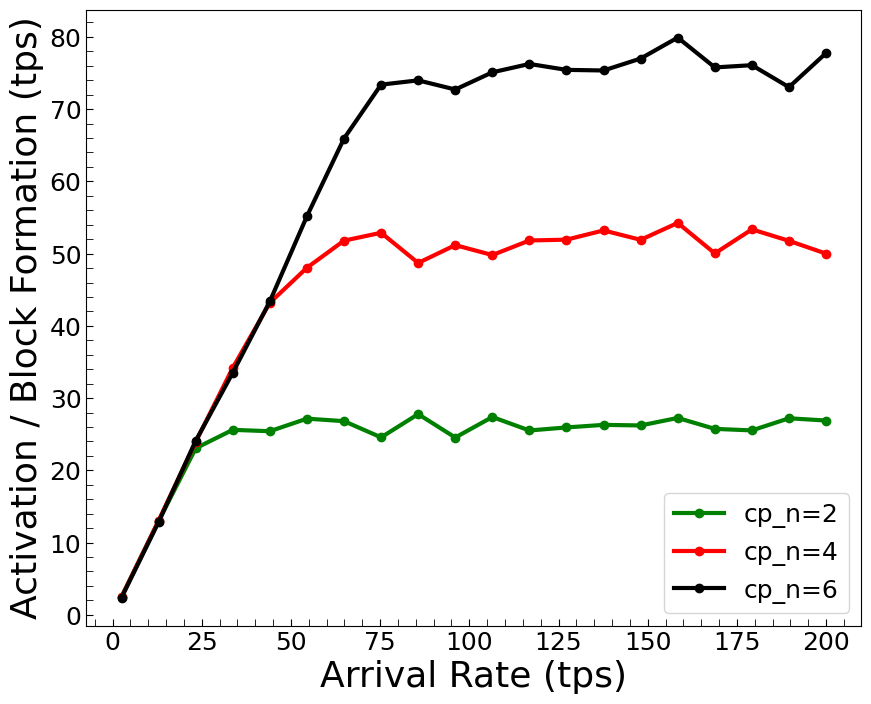

In [15]:
generate_plot('data/BLOCK_CALL_RATE.csv', 'Activation / Block Formation (tps)')

# Block Timeout

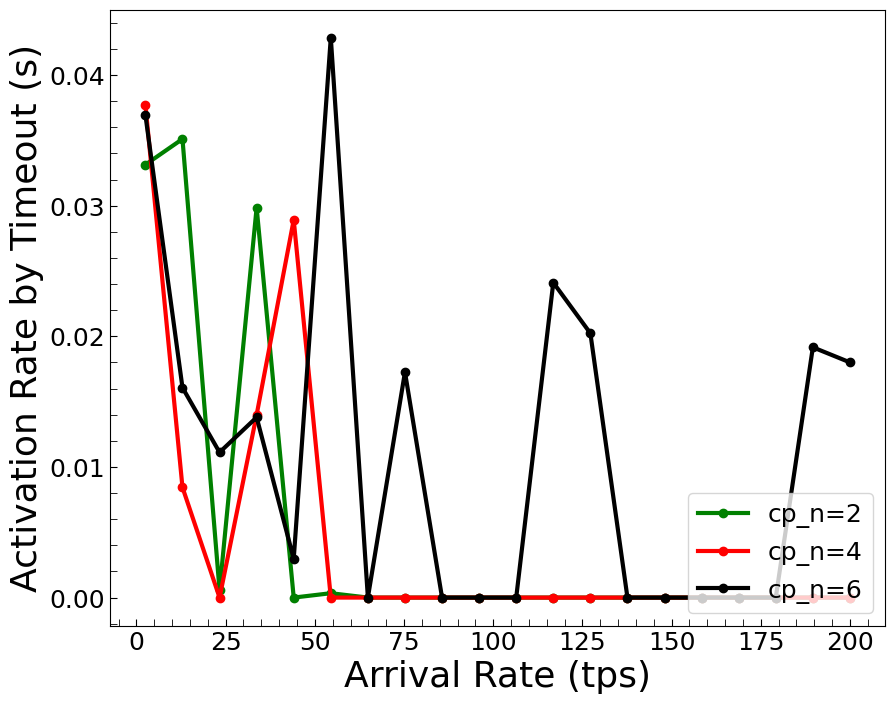

In [16]:
generate_plot('data/TIME_OUT_CALL_RATE.csv', 'Activation Rate by Timeout (s)')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Discard Probability - Block size

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


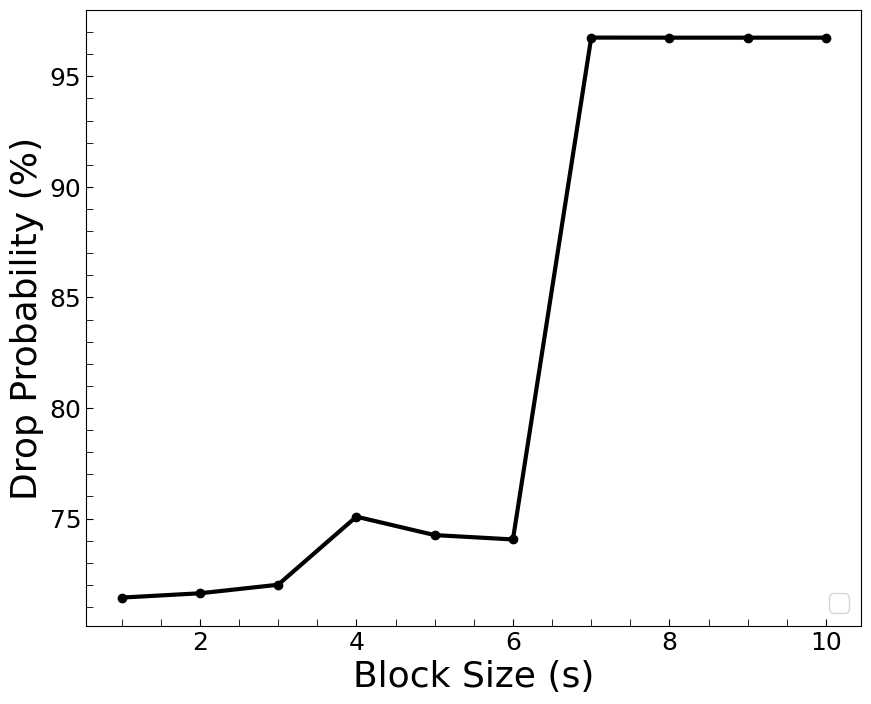

In [17]:
plot_with_metric_and_column("data/dp_var_block.csv", "Drop Probability (%)", 'BLOCK_SIZE', 'DP_PROB', "black")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Discard Probability - Block Timeout

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


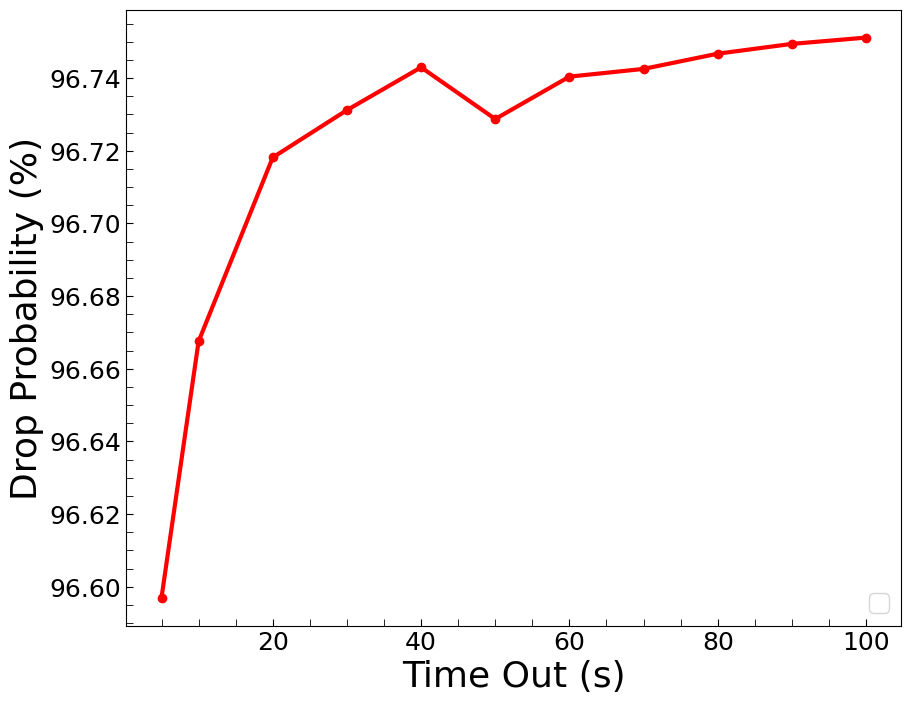

In [18]:
plot_with_metric_and_column("data/dp_var_timeout.csv", "Drop Probability (%)", "TIME_OUT", "DP_PROB", "red")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Mean Response Time (MRT) - Block size

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


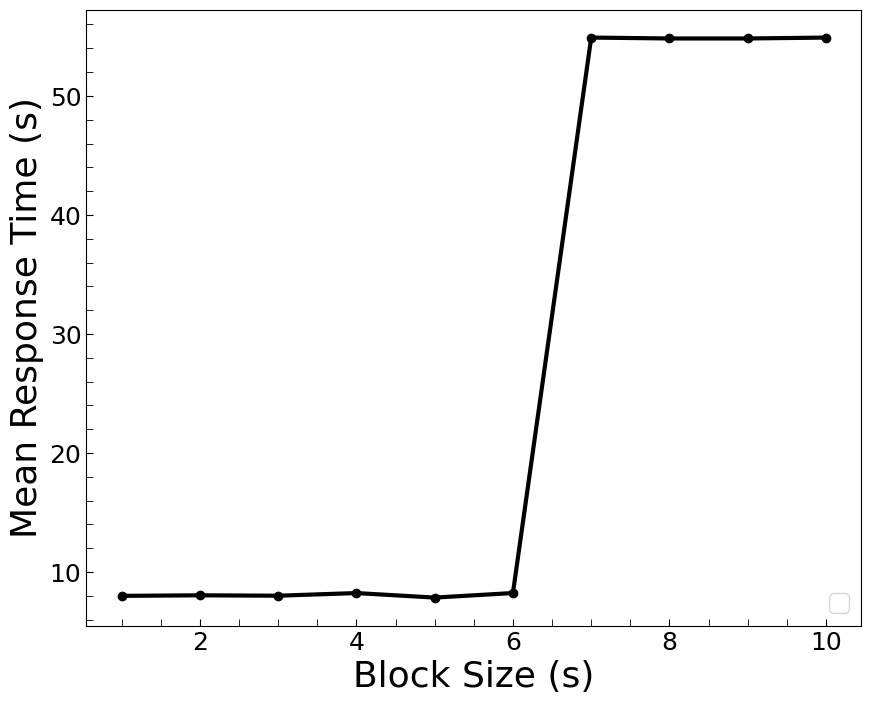

In [19]:
plot_with_metric_and_column("data/dp_var_block.csv", "Mean Response Time (s)", 'BLOCK_SIZE', 'MRT', "black")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Mean Response Time (MRT) - Block Timeout

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


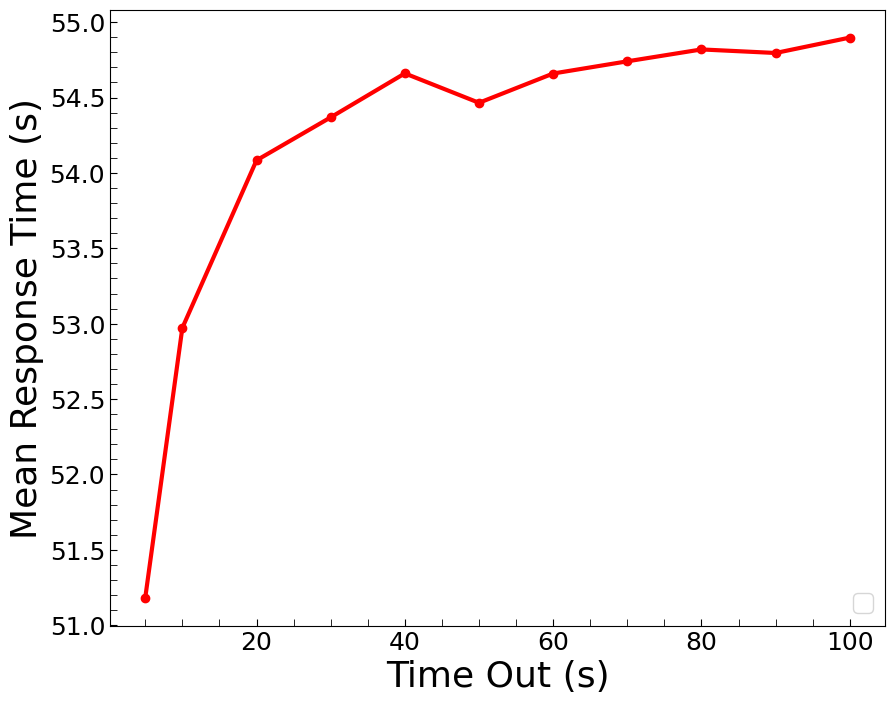

In [20]:
plot_with_metric_and_column("data/mrt_var_timeout.csv", "Mean Response Time (s)", "TIME_OUT", "MRT", "red")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Throughput - Block size

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


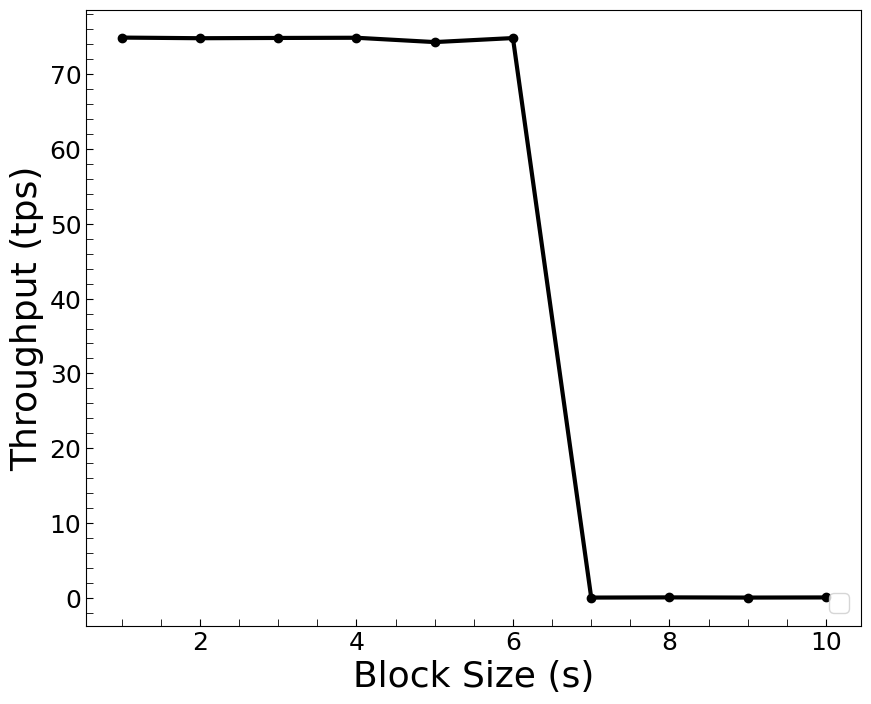

In [21]:
plot_with_metric_and_column("data/dp_var_block.csv", "Throughput (tps)", 'BLOCK_SIZE', 'TP', "black")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Throughput - Block Timeout

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


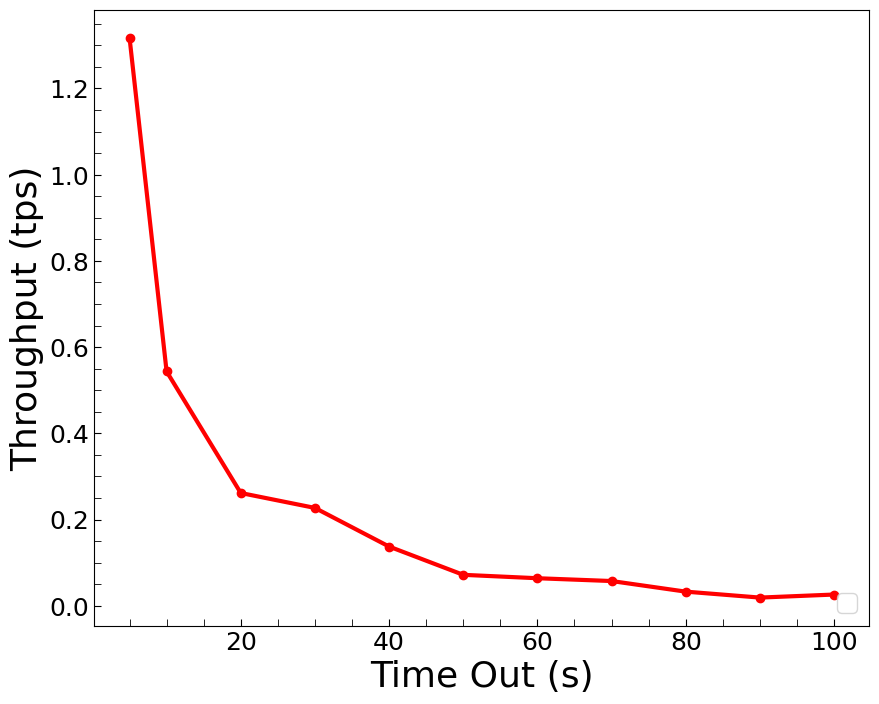

In [22]:
plot_with_metric_and_column("data/tp_var_timeout.csv", "Throughput (tps)", "TIME_OUT", "TP", "red")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

# Utilization - Blocksize

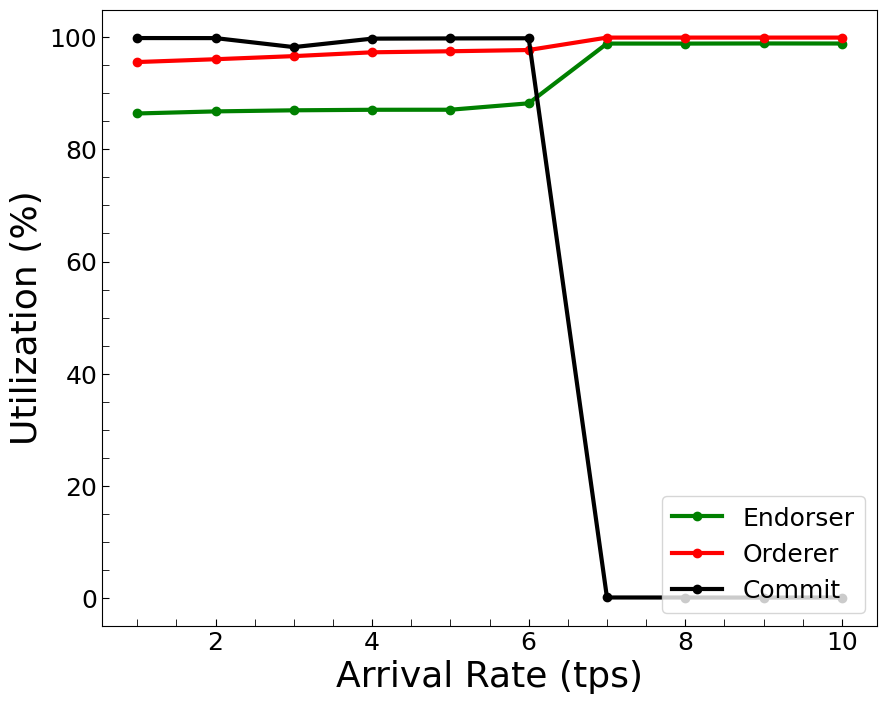

In [23]:
utilization_peers_plot("data/dp_var_block.csv", "Utilization (%)", 'BLOCK_SIZE')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Utilization - Block Timeout

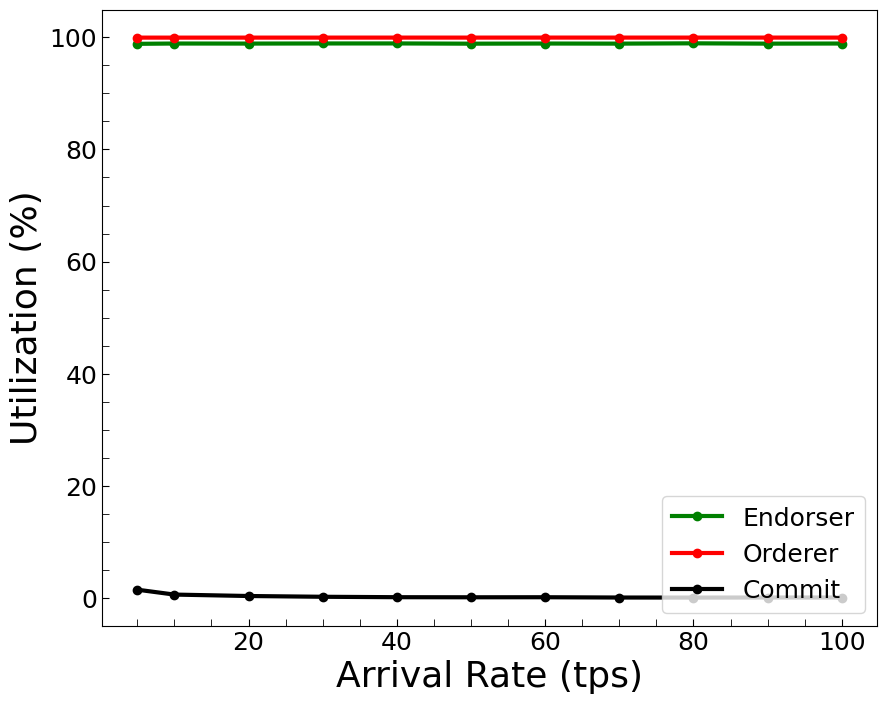

In [24]:
utilization_peers_plot("data/u_var.csv", "Utilization (%)", 'TIME_OUT')

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Call Rate - Block Size

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


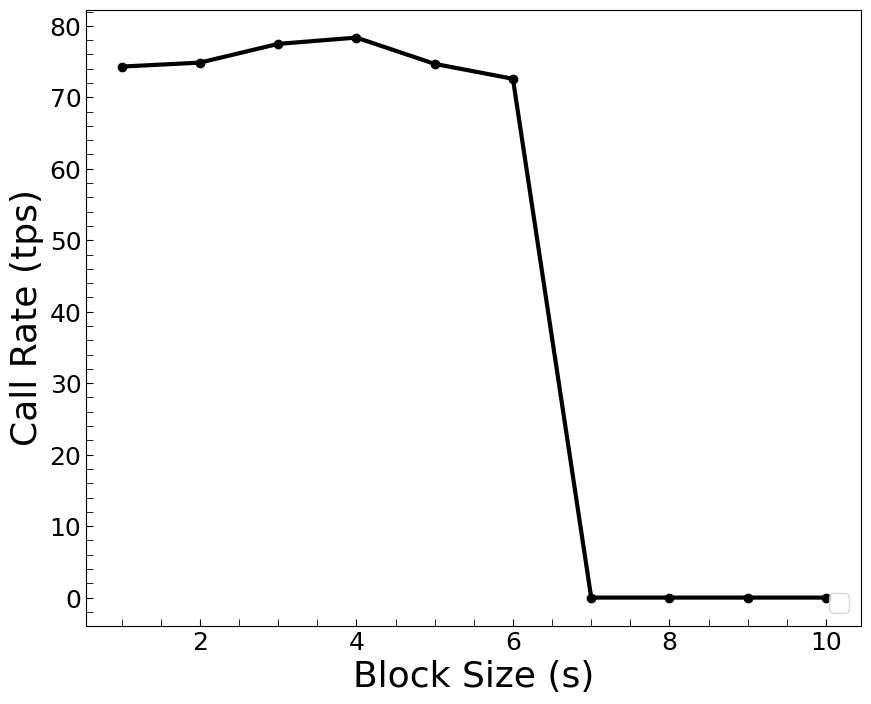

In [25]:
plot_with_metric_and_column("data/dp_var_block.csv", "Call Rate (tps)", 'BLOCK_SIZE', 'BLOCK_CALL_RATE', "black")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Call Rate - Block Timeout

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


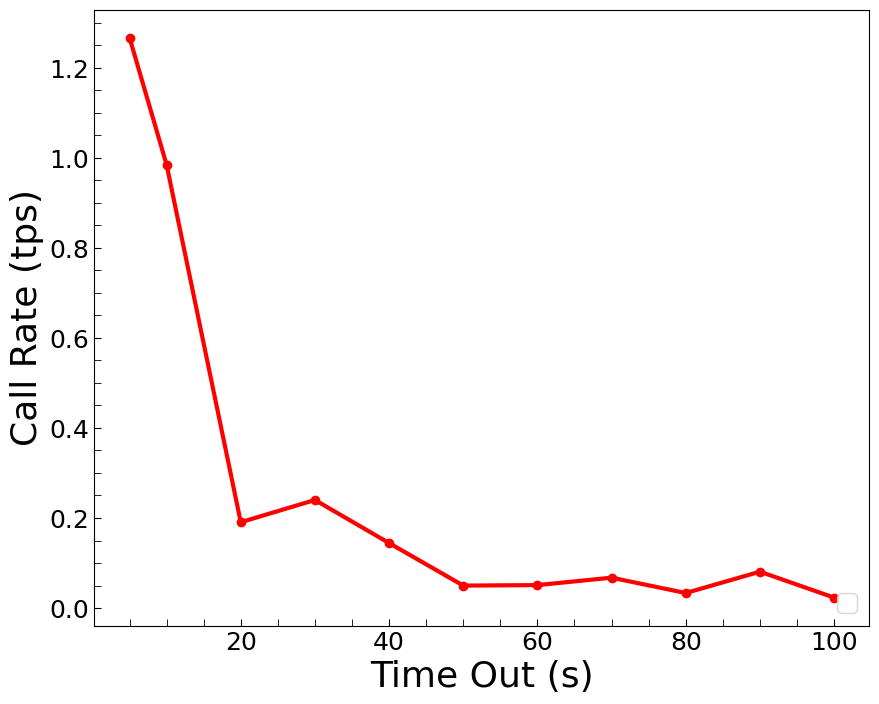

In [26]:
plot_with_metric_and_column("data/call_var_timeout.csv", "Call Rate (tps)", "TIME_OUT", "TIME_OUT_CALL_RATE", "red")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# Interaction between block size and timeout

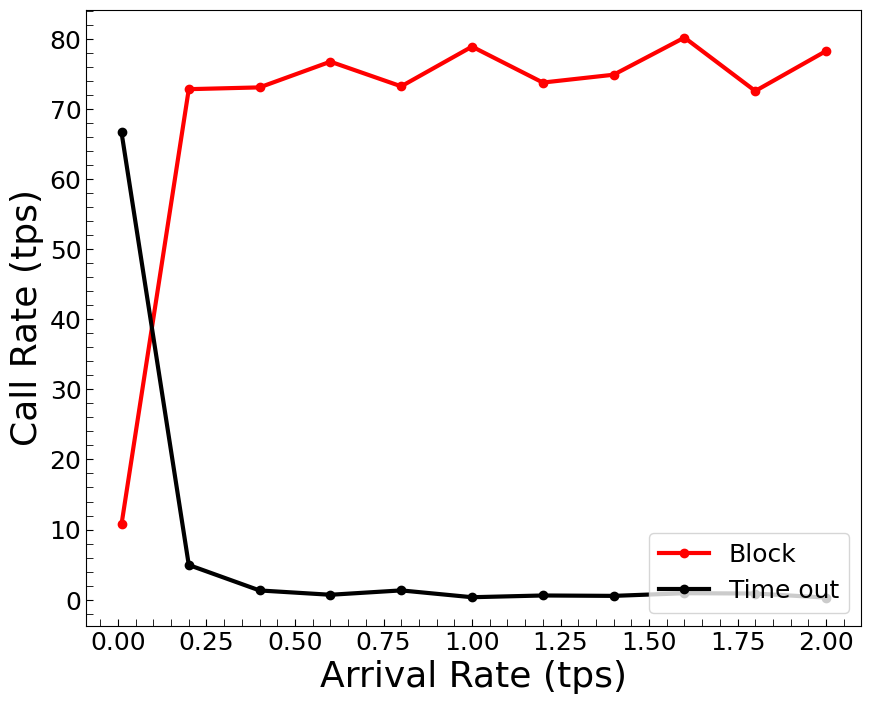

In [27]:
call_rate_plot("data/inter_var_timeout.csv", "Call Rate (tps)", 'TIME_OUT')

Model: mode_copy.xml
Parameters:
Simulation Error Percentage: 0.05
AD=10
CCP=6
CEP=6
COP=6
CEQ=100
COQ=100
CCQ=100
TE=0.005
TO3=0.01
TC=0.08
bloco=10.0
TIME_OUT=10
TO1=0.005
TO2=0.002